# Introduction to Python and Scikit-Learn

Mainly inspired from https://scikit-learn.org/stable/modules/tree.html.

In [1]:
# A useful package
import numpy as np

## Load a dataset

In [2]:
# From the library sklearn (Scikit-learn), in the part datasets
# I want to load the fonction 'load_iris'
from sklearn.datasets import load_breast_cancer

# Create the input and output data
# I call the function 'load_iris'...
X, y = load_breast_cancer(return_X_y=True)

In [3]:
load_breast_cancer?

### Divide this dataset into a learning set and a test set

In [4]:
# Size of my data
print(X.shape)
print(y.shape)

# Number of samples
print(X.shape[0])
# Number of attributes
print(X.shape[1])

(569, 30)
(569,)
569
30


In [5]:
number_of_ls = 250
## randomise a bit the data
random_state = 0
from sklearn.utils import check_random_state
random_state = check_random_state(random_state)
a_permutation = random_state.permutation(np.arange(X.shape[0]))
print("New order: {}".format(a_permutation))
X = X[a_permutation, :]
y = y[a_permutation]

# Now I can divide the dataset
X_train, X_test = X[:number_of_ls,:], X[number_of_ls:,:]
y_train, y_test = y[:number_of_ls], y[number_of_ls:]

print('LS size = {}'.format(X_train.shape))
print('TS size = {}'.format(X_train.shape)) #

New order: [512 457 439 298  37 515 382 310 538 345 421  90 412 157  89 172 318 233
 389 250  31 283 482 211 372 401 159  14 364 337 179   1 466 132 140  64
 224 127 434 353 414 358  10 546 465 564 175 235 188  15  12 194 134 463
 301 348 231 473 102 272 196  75 354 268 468 471 108 239 210  66 340  17
 249 385  45 458 525 356 350 391 566  78 118 319 330 170 308  46 264 567
  21 205 413 562 416 103 417 247 420 142  71 107 165 560  85 504 400 518
 263 213 519 432 516 500 338 427 406  96 490 384 281 325 190 380 366 469
 225 271 547 550 492 185 306 208 242 313 542 514 236 113 527  76 162 293
 332 565 278 489 346 357 355 112  68 526 206  65 437 126 429 392 343 334
 440 441 137 230   7 408 523 361 553 478 303 155 186 101  97  20 153  54
  30 531  49 100 336 299 347 502  56 144  60   6   8 474 320 252 202 246
 240  38 436 390 261 339 282 276 367 505 499 124 154 316  59 333 503 534
 563 453 262 378 229  55 171 454 243 158 415  34 561  18 508 322  51 219
 549  52  74  26 173  92 167   4 409 181

## Load an algorithm and learn a model

In [6]:
# or load the full module 
from sklearn import tree
clf = tree.DecisionTreeClassifier()

# or only load the DecisionTreeClassifier...
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

### What are the parameters of a model? 

In [7]:
clf?

### Learn a model = fit the model parameters

In [8]:
clf = clf.fit(X_train, y_train)

[Text(837.0, 757.1571428571428, 'X[23] <= 884.55\ngini = 0.467\nsamples = 250\nvalue = [93, 157]'),
 Text(558.0, 640.6714285714286, 'X[27] <= 0.162\ngini = 0.134\nsamples = 166\nvalue = [12, 154]'),
 Text(418.5, 524.1857142857143, 'X[3] <= 696.25\ngini = 0.038\nsamples = 156\nvalue = [3, 153]'),
 Text(348.75, 407.7, 'X[20] <= 16.83\ngini = 0.025\nsamples = 155\nvalue = [2, 153]'),
 Text(209.25, 291.21428571428567, 'X[9] <= 0.054\ngini = 0.013\nsamples = 153\nvalue = [1, 152]'),
 Text(139.5, 174.7285714285714, 'X[6] <= 0.058\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(69.75, 58.24285714285713, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(209.25, 58.24285714285713, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(279.0, 174.7285714285714, 'gini = 0.0\nsamples = 149\nvalue = [0, 149]'),
 Text(488.25, 291.21428571428567, 'X[29] <= 0.08\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(418.5, 174.7285714285714, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(558.0, 174.72857

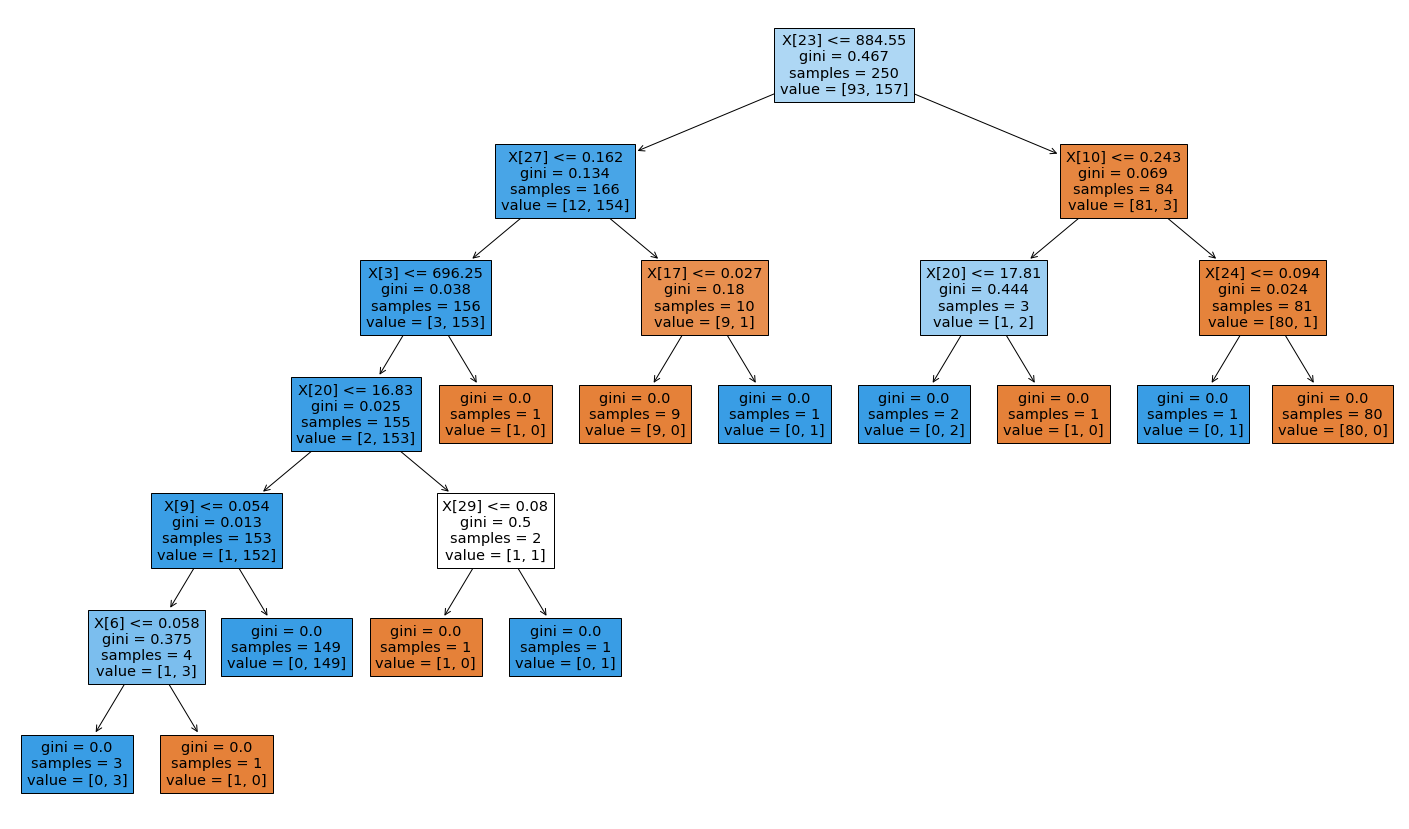

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,15))
tree.plot_tree(clf, filled=True)

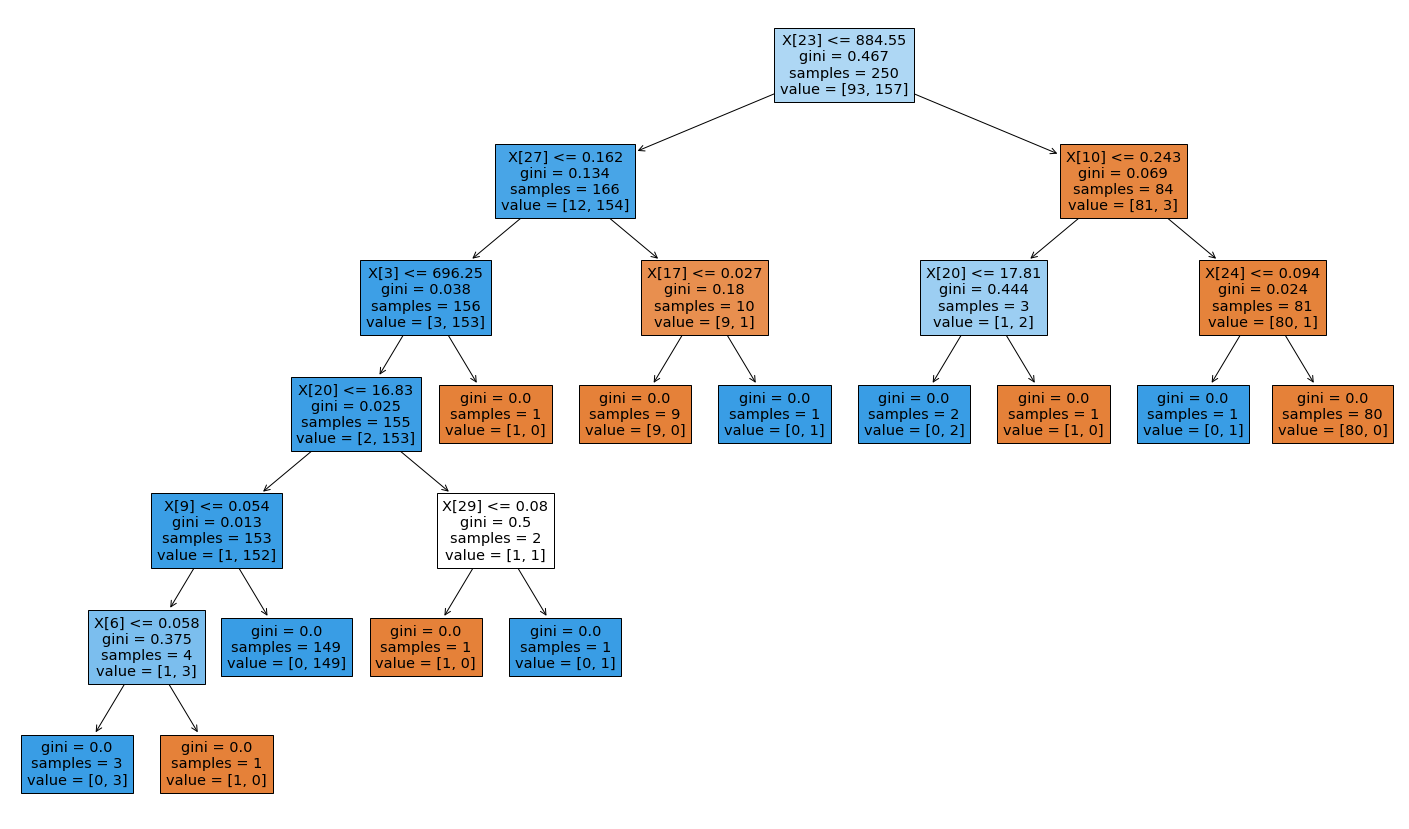

In [10]:
plt.figure(figsize=(25,15))
tree.plot_tree(clf, filled=True);

## Make a prediction?

In [11]:
predictions = clf.predict(X_test)

### Evaluate those prediction (we have the solution 'y_test')

In [12]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(X.shape[0], 20 * X.shape[1])]
X_train, X_test = X[:number_of_ls,:], X[number_of_ls:,:]
y_train, y_test = y[:number_of_ls], y[number_of_ls:]

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
# A solution, each classifier/regressor have a "score" property
clf.score(X_test, y_test)

0.9184952978056427

In [13]:
# But you can use other metrics (depending on what you want to evaluate, see Lecture 6)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9184952978056427

In [14]:
# More evaluation: predict the probability for each class
probas = clf.predict_proba(X_test)

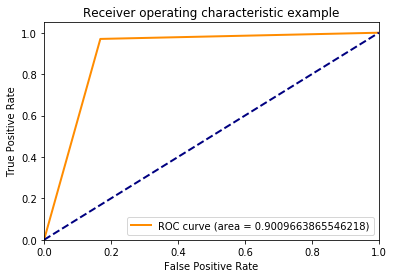

In [15]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
score = roc_auc_score(y_test,probas[:,1])

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {})'.format(score))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
